### Uczenie maszynowe
# 6. Problem nadmiernego dopasowania

## 6.1. Regresja wielomianowa

### Wprowadzenie: wybór cech

Niech naszym zadaniem będzie przewidzieć cenę działki o kształcie prostokąta.

Jakie cechy wybrać?

Możemy wybrać dwie cechy:

 * $x_1$ – szerokość działki, $x_2$ – długość działki:
$$ h_{\theta}(\vec{x}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

...albo jedną:

 * $x_1$ – powierzchnia działki:
$$ h_{\theta}(\vec{x}) = \theta_0 + \theta_1 x_1 $$

Można też zauważyć, że cecha „powierzchnia działki” powstaje przez pomnożenie dwóch innych cech: długości działki i jej szerokości.

**Wniosek:** możemy tworzyć nowe cechy na podstawie innych poprzez wykonywanie na nich różnych operacji matematycznych.

### Regresja wielomianowa

W regresji wielomianowej będziemy korzystać z cech, które utworzymy jako potęgi cech wyjściowych.

In [1]:
# Przydatne importy

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [2]:
# Przydatne funkcje


def cost(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()


def gradient(theta, X, y):
    """Wersja macierzowa gradientu funkcji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y))


def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-5):
    """Algorytm gradientu prostego (wersja macierzowa)"""
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print("Algorithm does not converge!")
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta])
    return theta, logs


def plot_data(X, y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c="r", s=50, label="Dane")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(0.05, 0.05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig


def plot_fun(fig, fun, X):
    """Wykres funkcji `fun`"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth="2")


In [3]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv(
    "data_flats.tsv", header=0, sep="\t", usecols=["price", "rooms", "sqrMetres"]
)
data = np.matrix(alldata[["sqrMetres", "price"]])

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 0:n]
Xn /= np.amax(Xn, axis=0)
Xn2 = np.power(Xn, 2)
Xn2 /= np.amax(Xn2, axis=0)
Xn3 = np.power(Xn, 3)
Xn3 /= np.amax(Xn3, axis=0)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2), axis=1)).reshape(m, 2 * n + 1)
X3 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn3), axis=1)).reshape(
    m, 3 * n + 1
)
y = np.matrix(data[:, -1]).reshape(m, 1)


Postać ogólna regresji wielomianowej:

$$ h_{\theta}(x) = \sum_{i=0}^{n} \theta_i x^i $$

In [4]:
# Funkcja regresji wielomianowej


def h_poly(Theta, x):
    """Funkcja wielomianowa"""
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))


def polynomial_regression(theta):
    """Funkcja regresji wielomianowej"""
    return lambda x: h_poly(theta, x)


Najprostszym przypadkiem regresji wielomianowej jest funkcja kwadratowa:

Funkcja kwadratowa:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$

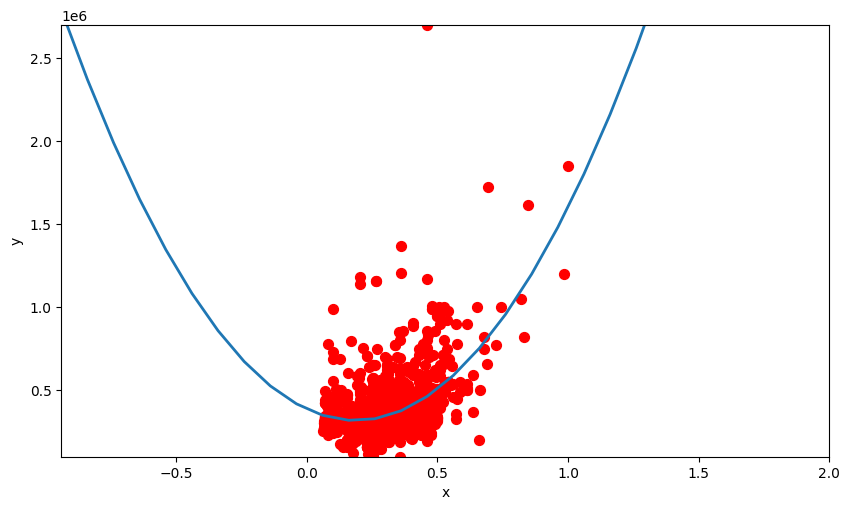

In [5]:
fig = plot_data(X2, y, xlabel="x", ylabel="y")
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, X2, y)
plot_fun(fig, polynomial_regression(theta), X)


Innym szczególnym przypadkiem regresji wielomianowej jest funkjca sześcienna:

Funkcja sześcienna:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$

[[ 397519.38046962]
 [-841341.14146733]
 [2253713.97125102]
 [-244009.07081946]]


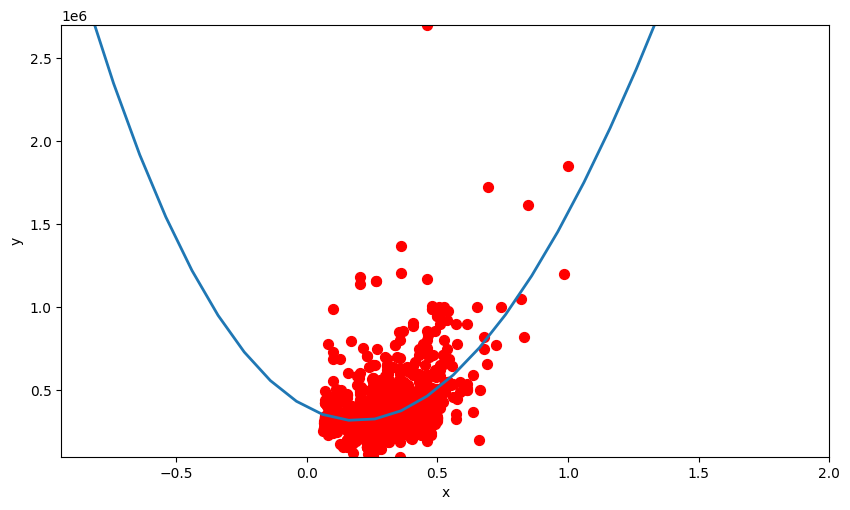

In [6]:
fig = plot_data(X3, y, xlabel="x", ylabel="y")
theta_start = np.matrix([0, 0, 0, 0]).reshape(4, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X3, y)
plot_fun(fig, polynomial_regression(theta), X)

print(theta)


Regresję wielomianową można potraktować jako szczególny przypadek regresji liniowej wielu zmiennych:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 $$
$$ x_1 = x, \quad x_2 = x^2, \quad x_3 = x^3, \quad \vec{x} = \left[ \begin{array}{ccc} x_0 \\ x_1 \\ x_2 \end{array} \right] $$

(W tym przypadku za kolejne cechy przyjmujemy kolejne potęgi zmiennej $x$).

Uwaga praktyczna: przyda się normalizacja cech, szczególnie skalowanie!

Do tworzenia cech „pochodnych” możemy używać nie tylko potęgowania, ale też innych operacji matematycznych, np.:

$$ h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 \sqrt{x} $$
$$ x_1 = x, \quad x_2 = \sqrt{x}, \quad \vec{x} = \left[ \begin{array}{ccc} x_0 \\ x_1 \end{array} \right] $$

Jakie zatem cechy wybrać? Najlepiej dopasować je do konkretnego problemu.

### Wielomianowa regresja logistyczna

Podobne modyfikacje cech możemy również stosować dla regresji logistycznej.

In [7]:
def powerme(x1, x2, n):
    """Funkcja, która generuje n potęg dla zmiennych x1 i x2 oraz ich iloczynów"""
    X = []
    for m in range(n + 1):
        for i in range(m + 1):
            X.append(np.multiply(np.power(x1, i), np.power(x2, (m - i))))
    return np.hstack(X)


In [8]:
# Wczytanie danych
import pandas
import numpy as np

alldata = pandas.read_csv("polynomial_logistic.tsv", sep="\t")
data = np.matrix(alldata)

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn = data[:, 1:]

Xpl = powerme(data[:, 1], data[:, 2], n)
Ypl = np.matrix(data[:, 0]).reshape(m, 1)

data[:10]


matrix([[ 1.        ,  0.36596696, -0.11214686],
        [ 0.        ,  0.4945305 ,  0.47110656],
        [ 0.        ,  0.70290604, -0.92257983],
        [ 0.        ,  0.46658862, -0.62269739],
        [ 0.        ,  0.87939462, -0.11408015],
        [ 0.        , -0.331185  ,  0.84447667],
        [ 0.        , -0.54351701,  0.8851383 ],
        [ 0.        ,  0.91979241,  0.41607012],
        [ 0.        ,  0.28011742,  0.61431157],
        [ 0.        ,  0.94754363, -0.78307311]])

In [9]:
def plot_data_for_classification(X, Y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    X = X.tolist()
    Y = Y.tolist()
    X1n = [x[1] for x, y in zip(X, Y) if y[0] == 0]
    X1p = [x[1] for x, y in zip(X, Y) if y[0] == 1]
    X2n = [x[2] for x, y in zip(X, Y) if y[0] == 0]
    X2p = [x[2] for x, y in zip(X, Y) if y[0] == 1]
    ax.scatter(X1n, X2n, c="r", marker="x", s=50, label="Dane")
    ax.scatter(X1p, X2p, c="g", marker="o", s=50, label="Dane")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(0.05, 0.05)
    return fig


Przyjmijmy, że mamy następujące dane i chcemy przeprowadzić klasyfikację dwuklasową dla następujących klas:
 * czerwone krzyżyki
 * zielone kółka

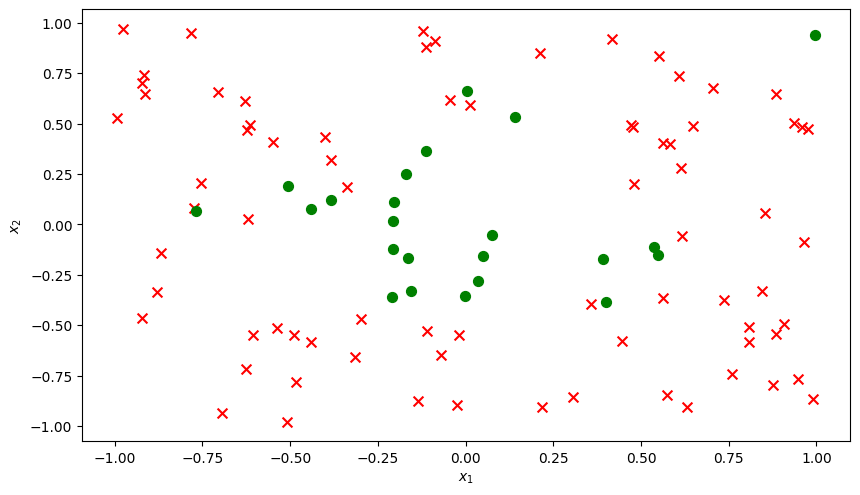

In [10]:
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r"$x_1$", ylabel=r"$x_2$")


Propozycja hipotezy:

$$ h_\theta(x) = g(\theta^T x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5) \; , $$

gdzie $g$ – funkcja logistyczna, $x_3 = x_1^2$, $x_4 = x_2^2$, $x_5 = x_1 x_2$.

In [11]:
def safeSigmoid(x, eps=0):
    """Funkcja sigmoidalna zmodyfikowana w taki sposób,
    żeby wartości zawsz były odległe od asymptot o co najmniej eps
    """
    y = 1.0 / (1.0 + np.exp(-x))
    if eps > 0:
        y[y < eps] = eps
        y[y > 1 - eps] = 1 - eps
    return y


def h(theta, X, eps=0.0):
    """Funkcja hipotezy"""
    return safeSigmoid(X * theta, eps)


def J(h, theta, X, y, lamb=0):
    """Funkcja kosztu"""
    m = len(y)
    f = h(theta, X, eps=10**-7)
    j = (
        -np.sum(np.multiply(y, np.log(f)) + np.multiply(1 - y, np.log(1 - f)), axis=0)
        / m
    )
    if lamb > 0:
        j += lamb / (2 * m) * np.sum(np.power(theta[1:], 2))
    return j


def dJ(h, theta, X, y, lamb=0):
    """Pochodna funkcji kosztu"""
    g = 1.0 / y.shape[0] * (X.T * (h(theta, X) - y))
    if lamb > 0:
        g[1:] += lamb / float(y.shape[0]) * theta[1:]
    return g


def classifyBi(theta, X):
    """Funkcja decyzji"""
    prob = h(theta, X)
    return prob


In [12]:
def GD(h, fJ, fdJ, theta, X, y, alpha=0.01, eps=10**-3, maxSteps=10000):
    """Metoda gradientu prostego dla regresji logistycznej"""
    errorCurr = fJ(h, theta, X, y)
    errors = [[errorCurr, theta]]
    while True:
        # oblicz nowe theta
        theta = theta - alpha * fdJ(h, theta, X, y)
        # raportuj poziom błędu
        errorCurr, errorPrev = fJ(h, theta, X, y), errorCurr
        # kryteria stopu
        if abs(errorPrev - errorCurr) <= eps:
            break
        if len(errors) > maxSteps:
            break
        errors.append([errorCurr, theta])
    return theta, errors


In [13]:
# Uruchomienie metody gradientu prostego dla regresji logistycznej
theta_start = np.matrix(np.zeros(Xpl.shape[1])).reshape(Xpl.shape[1], 1)
theta, errors = GD(
    h, J, dJ, theta_start, Xpl, Ypl, alpha=0.1, eps=10**-7, maxSteps=10000
)
print(r"theta = {}".format(theta))


theta = [[ 1.59558981]
 [ 0.12602307]
 [ 0.65718518]
 [-5.26367581]
 [ 1.96832544]
 [-6.97946065]]


In [14]:
def plot_decision_boundary(fig, theta, X):
    """Wykres granicy klas"""
    ax = fig.axes[0]
    xx, yy = np.meshgrid(np.arange(-1.0, 1.0, 0.02), np.arange(-1.0, 1.0, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l, 1), yy.reshape(l, 1), n)
    z = classifyBi(theta, C).reshape(int(np.sqrt(l)), int(np.sqrt(l)))

    plt.contour(xx, yy, z, levels=[0.5], lw=3)


/tmp/ipykernel_74/1169766636.py:9: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, z, levels=[0.5], lw=3)


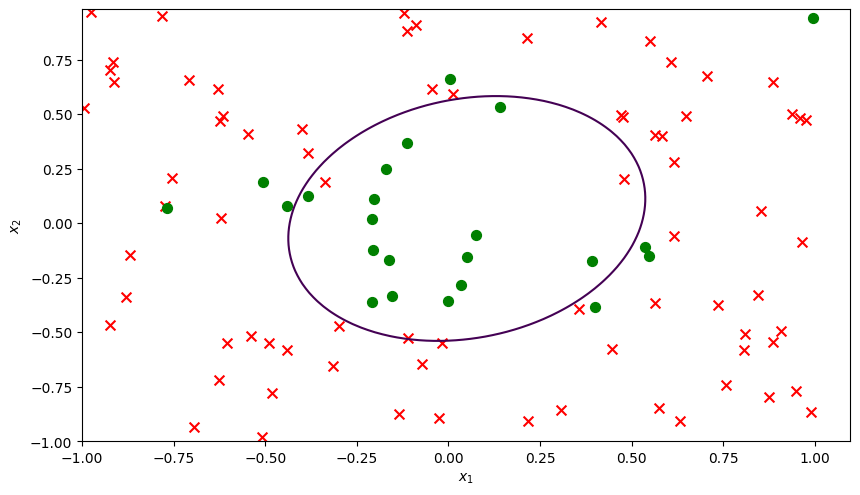

In [15]:
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r"$x_1$", ylabel=r"$x_2$")
plot_decision_boundary(fig, theta, Xpl)


In [16]:
# Wczytanie danych

alldata = pandas.read_csv("polynomial_logistic.tsv", sep="\t")
data = np.matrix(alldata)

m, n_plus_1 = data.shape
Xn = data[:, 1:]

n = 10
Xpl = powerme(data[:, 1], data[:, 2], n)
Ypl = np.matrix(data[:, 0]).reshape(m, 1)

theta_start = np.matrix(np.zeros(Xpl.shape[1])).reshape(Xpl.shape[1], 1)
theta, errors = GD(
    h, J, dJ, theta_start, Xpl, Ypl, alpha=0.1, eps=10**-7, maxSteps=10000
)


/tmp/ipykernel_74/1169766636.py:9: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, z, levels=[0.5], lw=3)


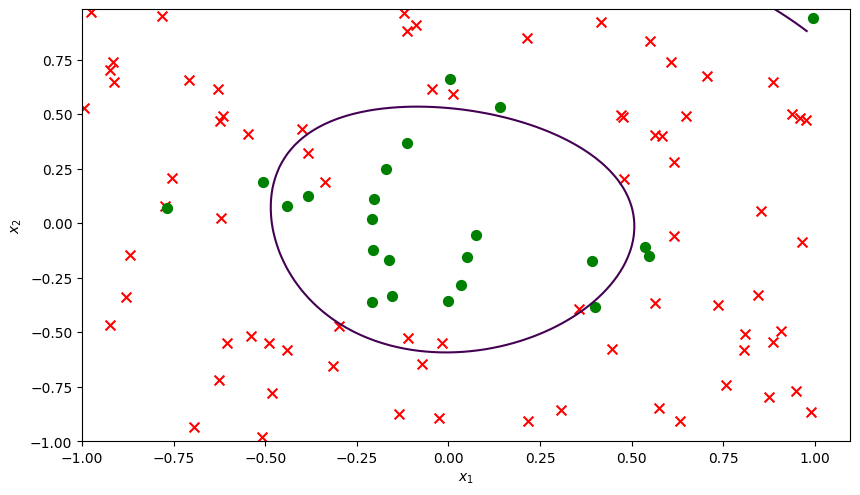

In [17]:
# Przykład dla większej liczby cech
fig = plot_data_for_classification(Xpl, Ypl, xlabel=r"$x_1$", ylabel=r"$x_2$")
plot_decision_boundary(fig, theta, Xpl)


## 6.2. Problem nadmiernego dopasowania

### Obciążenie a wariancja

In [18]:
# Dane do prostego przykładu

data = np.matrix(
    [
        [0.0, 0.0],
        [0.5, 1.8],
        [1.0, 4.8],
        [1.6, 7.2],
        [2.6, 8.8],
        [3.0, 9.0],
    ]
)

m, n_plus_1 = data.shape
n = n_plus_1 - 1
Xn1 = data[:, 0:n]
Xn1 /= np.amax(Xn1, axis=0)
Xn2 = np.power(Xn1, 2)
Xn2 /= np.amax(Xn2, axis=0)
Xn3 = np.power(Xn1, 3)
Xn3 /= np.amax(Xn3, axis=0)
Xn4 = np.power(Xn1, 4)
Xn4 /= np.amax(Xn4, axis=0)
Xn5 = np.power(Xn1, 5)
Xn5 /= np.amax(Xn5, axis=0)

X1 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn1, Xn2), axis=1)).reshape(
    m, 2 * n + 1
)
X5 = np.matrix(
    np.concatenate((np.ones((m, 1)), Xn1, Xn2, Xn3, Xn4, Xn5), axis=1)
).reshape(m, 5 * n + 1)
y = np.matrix(data[:, -1]).reshape(m, 1)


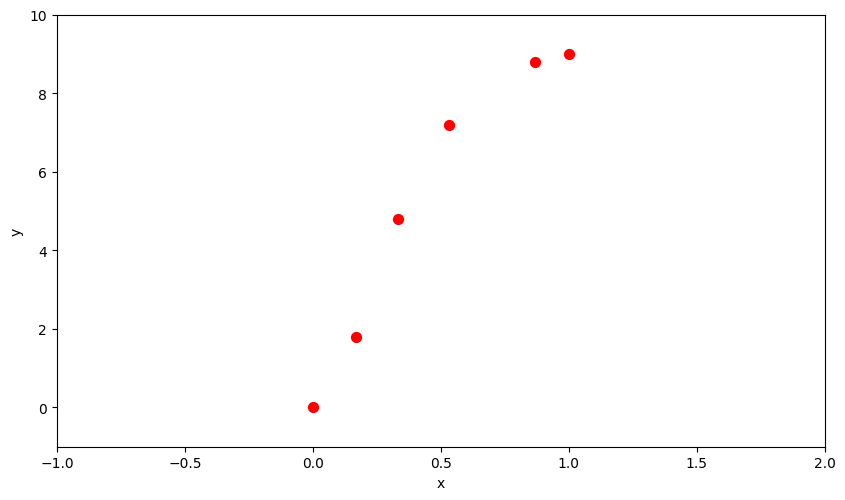

In [19]:
fig = plot_data(X1, y, xlabel="x", ylabel="y")


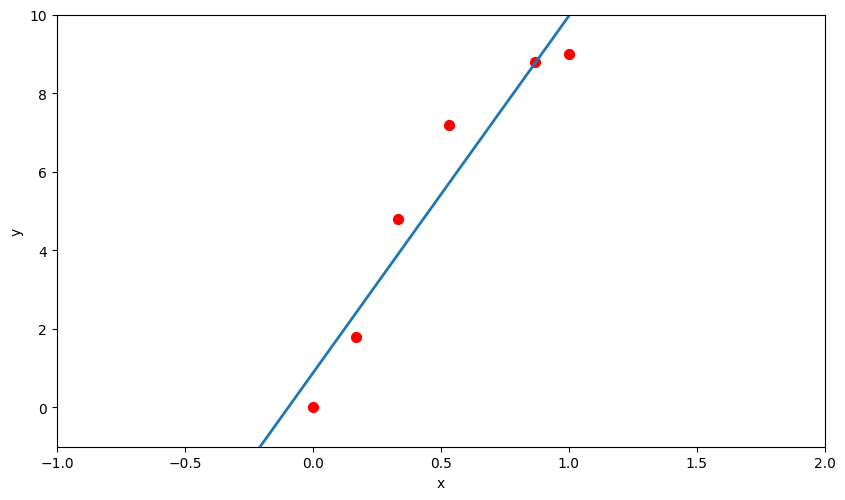

In [20]:
fig = plot_data(X1, y, xlabel="x", ylabel="y")
theta_start = np.matrix([0, 0]).reshape(2, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X1, y, eps=0.00001)
plot_fun(fig, polynomial_regression(theta), X1)


Ten model ma duże **obciążenie** (**błąd systematyczny**, *bias*) – zachodzi **niedostateczne dopasowanie** (*underfitting*).

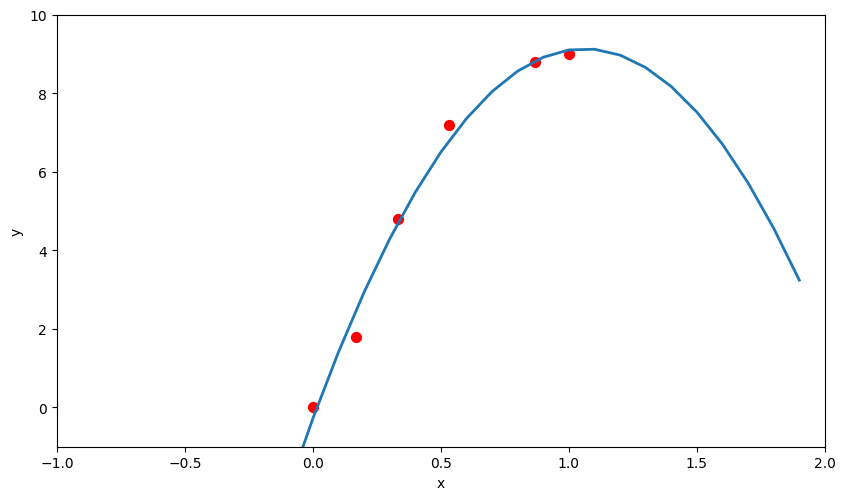

In [21]:
fig = plot_data(X2, y, xlabel="x", ylabel="y")
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X2, y, eps=0.000001)
plot_fun(fig, polynomial_regression(theta), X1)


Ten model jest odpowiednio dopasowany.

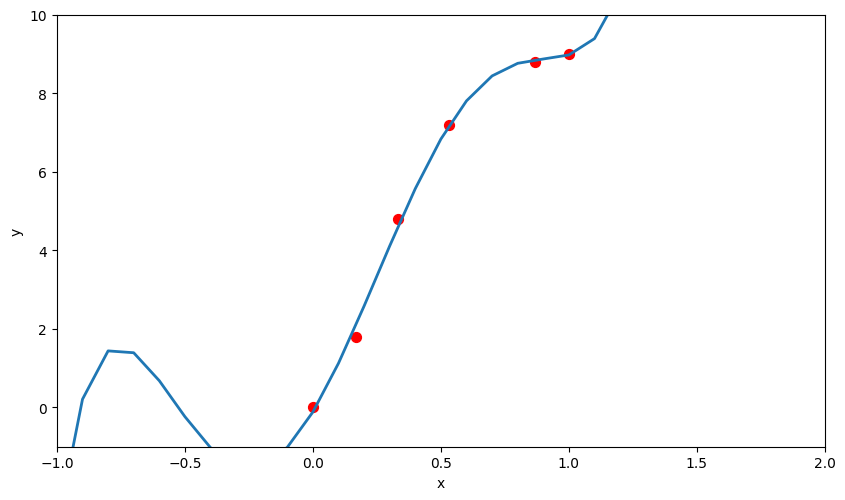

In [22]:
fig = plot_data(X5, y, xlabel="x", ylabel="y")
theta_start = np.matrix([0, 0, 0, 0, 0, 0]).reshape(6, 1)
theta, _ = gradient_descent(cost, gradient, theta_start, X5, y, alpha=0.5, eps=10**-7)
plot_fun(fig, polynomial_regression(theta), X1)


Ten model ma dużą **wariancję** (*variance*) – zachodzi **nadmierne dopasowanie** (*overfitting*).

(Zwróć uwagę na dziwny kształt krzywej w lewej części wykresu – to m.in. efekt nadmiernego dopasowania).

Nadmierne dopasowanie występuje, gdy model ma zbyt dużo stopni swobody w stosunku do ilości danych wejściowych.

Jest to zjawisko niepożądane.

Możemy obrazowo powiedzieć, że nadmierne dopasowanie występuje, gdy model zaczyna modelować szum/zakłócenia w danych zamiast ich „głównego nurtu”. 

Zobacz też: https://pl.wikipedia.org/wiki/Nadmierne_dopasowanie

<img style="margin:auto" width="90%" src="fit.png"/>

### Obciążenie (błąd systematyczny, *bias*)

* Wynika z błędnych założeń co do algorytmu uczącego się.
* Duże obciążenie powoduje niedostateczne dopasowanie.

### Wariancja (*variance*)

* Wynika z nadwrażliwości na niewielkie fluktuacje w zbiorze uczącym.
* Wysoka wariancja może spowodować nadmierne dopasowanie (modelując szum zamiast sygnału).

<img style="margin:auto" width="40%" src="bias2.png"/>

<img style="margin:auto" width="60%" src="curves.jpg"/>

## 6.3. Regularyzacja

In [23]:
def SGD(
    h,
    fJ,
    fdJ,
    theta,
    X,
    Y,
    alpha=0.001,
    maxEpochs=1.0,
    batchSize=100,
    adaGrad=False,
    logError=False,
    validate=0.0,
    valStep=100,
    lamb=0,
    trainsetsize=1.0,
):
    """Stochastic Gradient Descent - stochastyczna wersja metody gradientu prostego
    (więcej na ten temat na następnym wykładzie)
    """
    errorsX, errorsY = [], []
    errorsVX, errorsVY = [], []

    XT, YT = X, Y

    m_end = int(trainsetsize * len(X))

    if validate > 0:
        mv = int(X.shape[0] * validate)
        XV, YV = X[:mv], Y[:mv]
        XT, YT = X[mv:m_end], Y[mv:m_end]
    m, n = XT.shape

    start, end = 0, batchSize
    maxSteps = (m * float(maxEpochs)) / batchSize

    if adaGrad:
        hgrad = np.matrix(np.zeros(n)).reshape(n, 1)

    for i in range(int(maxSteps)):
        XBatch, YBatch = XT[start:end, :], YT[start:end, :]

        grad = fdJ(h, theta, XBatch, YBatch, lamb=lamb)
        if adaGrad:
            hgrad += np.multiply(grad, grad)
            Gt = 1.0 / (10**-7 + np.sqrt(hgrad))
            theta = theta - np.multiply(alpha * Gt, grad)
        else:
            theta = theta - alpha * grad

        if logError:
            errorsX.append(float(i * batchSize) / m)
            errorsY.append(fJ(h, theta, XBatch, YBatch).item())
            if validate > 0 and i % valStep == 0:
                errorsVX.append(float(i * batchSize) / m)
                errorsVY.append(fJ(h, theta, XV, YV).item())

        if start + batchSize < m:
            start += batchSize
        else:
            start = 0
        end = min(start + batchSize, m)
    return theta, (errorsX, errorsY, errorsVX, errorsVY)


In [24]:
# Przygotowanie danych do przykładu regularyzacji

n = 6

data = np.matrix(np.loadtxt("ex2data2.txt", delimiter=","))
np.random.shuffle(data)

X = powerme(data[:, 0], data[:, 1], n)
Y = data[:, 2]


In [25]:
def draw_regularization_example(
    X, Y, lamb=0, alpha=1, adaGrad=True, maxEpochs=2500, validate=0.25
):
    """Rusuje przykład regularyzacji"""
    plt.figure(figsize=(16, 8))
    plt.subplot(121)
    plt.scatter(
        X[:, 2].tolist(),
        X[:, 1].tolist(),
        c=Y.tolist(),
        s=100,
        cmap=plt.cm.get_cmap("prism"),
    )

    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1], 1)
    thetaBest, err = SGD(
        h,
        J,
        dJ,
        theta,
        X,
        Y,
        alpha=alpha,
        adaGrad=adaGrad,
        maxEpochs=maxEpochs,
        batchSize=100,
        logError=True,
        validate=validate,
        valStep=1,
        lamb=lamb,
    )

    xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.02), np.arange(-1.5, 1.5, 0.02))
    l = len(xx.ravel())
    C = powerme(xx.reshape(l, 1), yy.reshape(l, 1), n)
    z = classifyBi(thetaBest, C).reshape(int(np.sqrt(l)), int(np.sqrt(l)))

    plt.contour(xx, yy, z, levels=[0.5], lw=3)
    plt.ylim(-1, 1.2)
    plt.xlim(-1, 1.2)
    plt.legend()
    plt.subplot(122)
    plt.plot(err[0], err[1], lw=3, label="Training error")
    if validate > 0:
        plt.plot(err[2], err[3], lw=3, label="Validation error")
    plt.legend()
    plt.ylim(0.2, 0.8)


/tmp/ipykernel_74/2678993393.py:5: RuntimeWarning: overflow encountered in exp
  y = 1.0 / (1.0 + np.exp(-x))
/tmp/ipykernel_74/2651435526.py:38: UserWarning: The following kwargs were not used by contour: 'lw'
  plt.contour(xx, yy, z, levels=[0.5], lw=3)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


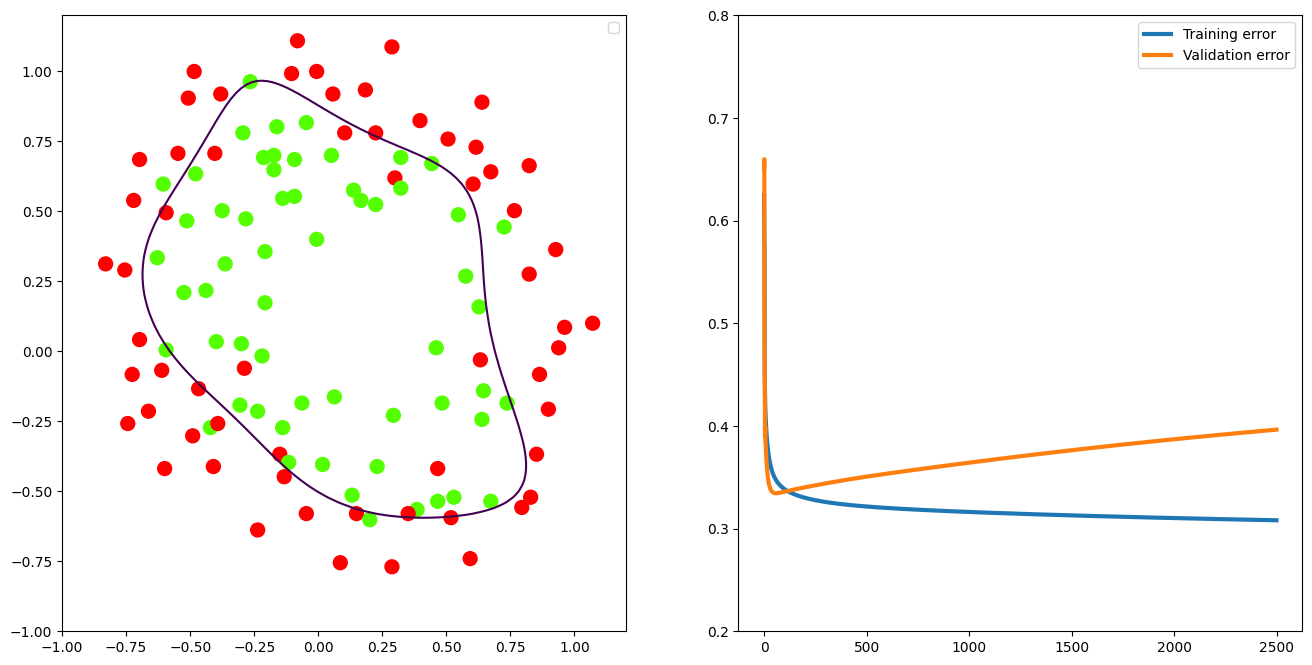

In [26]:
draw_regularization_example(X, Y)


### Regularyzacja

Regularyzacja jest metodą zapobiegania zjawisku nadmiernego dopasowania (*overfitting*) poprzez odpowiednie zmodyfikowanie funkcji kosztu.

Do funkcji kosztu dodawane jest specjalne wyrażenie (**wyrażenie regularyzacyjne** – zaznaczone na czerwono w poniższych wzorach), będące „karą” za ekstremalne wartości parametrów $\theta$.

W ten sposób preferowane są wektory $\theta$ z mniejszymi wartosciami parametrów – mają automatycznie niższy koszt.

Jak silną regularyzację chcemy zastosować? Możemy o tym zadecydować, dobierajac odpowiednio **parametr regularyzacji** $\lambda$.

Przedstawiona tu metoda regularyzacji to tzw. metoda L2 (*ridge*). Istnieją również inne metody regularyzacji, które charakteryzują się trochę innymi własnościami, np. L2 (*lasso*) lub *elastic net*. Więcej na ten temat można przeczytać np. tu:
* [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)
* [Ridge and Lasso Regression: L1 and L2 Regularization](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)
* [Elastic Net Regression](https://towardsdatascience.com/elastic-net-regression-from-sklearn-to-tensorflow-3b48eee45e91)

### Regularyzacja dla regresji liniowej – funkcja kosztu

$$
J(\theta) \, = \, \dfrac{1}{2m} \left( \displaystyle\sum_{i=1}^{m} h_\theta(x^{(i)}) - y^{(i)} \color{red}{ + \lambda \displaystyle\sum_{j=1}^{n} \theta^2_j } \right)
$$

* $\lambda$ – parametr regularyzacji
* jeżeli $\lambda$ jest zbyt mały, skutkuje to nadmiernym dopasowaniem
* jeżeli $\lambda$ jest zbyt duży, skutkuje to niedostatecznym dopasowaniem

### Regularyzacja dla regresji liniowej – gradient

$$\small
\begin{array}{llll}
\dfrac{\partial J(\theta)}{\partial \theta_0} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_0 & \textrm{dla $j = 0$ }\\
\dfrac{\partial J(\theta)}{\partial \theta_j} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_j \color{red}{+ \dfrac{\lambda}{m}\theta_j} & \textrm{dla $j = 1, 2, \ldots, n $} \\
\end{array} 
$$

### Regularyzacja dla regresji logistycznej – funkcja kosztu

$$
\begin{array}{rtl}
J(\theta) & = & -\dfrac{1}{m} \left( \displaystyle\sum_{i=1}^{m} y^{(i)} \log h_\theta(x^{(i)}) + \left( 1-y^{(i)} \right) \log \left( 1-h_\theta(x^{(i)}) \right) \right) \\
& & \color{red}{ + \dfrac{\lambda}{2m} \displaystyle\sum_{j=1}^{n} \theta^2_j } \\
\end{array}
$$

### Regularyzacja dla regresji logistycznej – gradient

$$\small
\begin{array}{llll}
\dfrac{\partial J(\theta)}{\partial \theta_0} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_0 & \textrm{dla $j = 0$ }\\
\dfrac{\partial J(\theta)}{\partial \theta_j} &=& \dfrac{1}{m}\displaystyle\sum_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right) x^{(i)}_j \color{red}{+ \dfrac{\lambda}{m}\theta_j} & \textrm{dla $j = 1, 2, \ldots, n $} \\
\end{array} 
$$

### Implementacja metody regularyzacji

In [27]:
def J_(h, theta, X, y, lamb=0):
    """Funkcja kosztu z regularyzacją"""
    m = float(len(y))
    f = h(theta, X, eps=10**-7)
    j = 1.0 / m * -np.sum(
        np.multiply(y, np.log(f)) + np.multiply(1 - y, np.log(1 - f)), axis=0
    ) + lamb / (2 * m) * np.sum(np.power(theta[1:], 2))
    return j


def dJ_(h, theta, X, y, lamb=0):
    """Gradient funkcji kosztu z regularyzacją"""
    m = float(y.shape[0])
    g = 1.0 / y.shape[0] * (X.T * (h(theta, X) - y))
    g[1:] += lamb / m * theta[1:]
    return g


In [28]:
slider_lambda = widgets.FloatSlider(
    min=0.0, max=0.5, step=0.005, value=0.01, description=r"$\lambda$", width=300
)


def slide_regularization_example_2(lamb):
    draw_regularization_example(X, Y, lamb=lamb)


In [29]:
widgets.interact_manual(slide_regularization_example_2, lamb=slider_lambda)


interactive(children=(FloatSlider(value=0.01, description='$\\lambda$', max=0.5, step=0.005), Button(descripti…

<function __main__.slide_regularization_example_2(lamb)>

In [30]:
def cost_lambda_fun(lamb):
    """Koszt w zależności od parametru regularyzacji lambda"""
    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1], 1)
    thetaBest, err = SGD(
        h,
        J,
        dJ,
        theta,
        X,
        Y,
        alpha=1,
        adaGrad=True,
        maxEpochs=2500,
        batchSize=100,
        logError=True,
        validate=0.25,
        valStep=1,
        lamb=lamb,
    )
    return err[1][-1], err[3][-1]


def plot_cost_lambda():
    """Wykres kosztu w zależności od parametru regularyzacji lambda"""
    plt.figure(figsize=(16, 8))
    ax = plt.subplot(111)
    Lambda = np.arange(0.0, 1.0, 0.01)
    Costs = [cost_lambda_fun(lamb) for lamb in Lambda]
    CostTrain = [cost[0] for cost in Costs]
    CostCV = [cost[1] for cost in Costs]
    plt.plot(Lambda, CostTrain, lw=3, label="training error")
    plt.plot(Lambda, CostCV, lw=3, label="validation error")
    ax.set_xlabel(r"$\lambda$")
    ax.set_ylabel("cost")
    plt.legend()
    plt.ylim(0.2, 0.8)


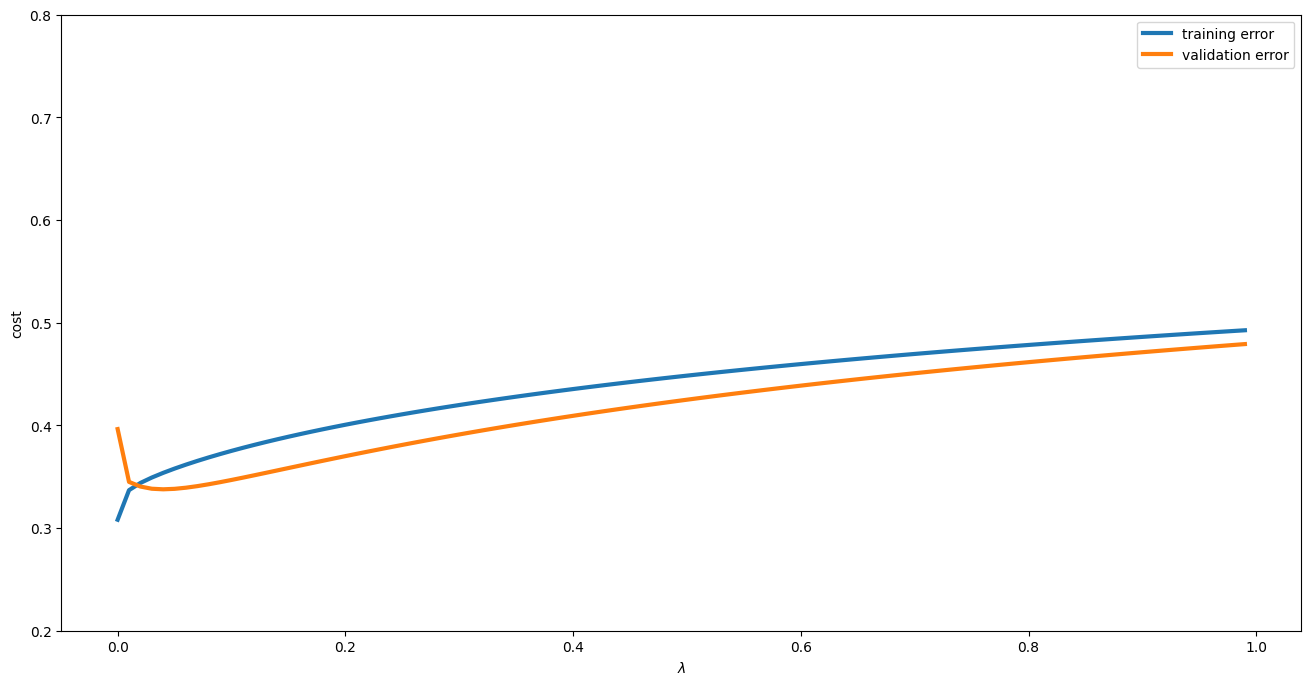

In [31]:
plot_cost_lambda()


## 5.4. Krzywa uczenia się

* Krzywa uczenia pozwala sprawdzić, czy uczenie przebiega poprawnie.
* Krzywa uczenia to wykres zależności między wielkością zbioru treningowego a wartością funkcji kosztu.
* Wraz ze wzrostem wielkości zbioru treningowego wartość funkcji kosztu na zbiorze treningowym rośnie.
* Wraz ze wzrostem wielkości zbioru treningowego wartość funkcji kosztu na zbiorze walidacyjnym maleje.

In [32]:
def cost_trainsetsize_fun(m):
    """Koszt w zależności od wielkości zbioru uczącego"""
    theta = np.matrix(np.zeros(X.shape[1])).reshape(X.shape[1], 1)
    thetaBest, err = SGD(
        h,
        J,
        dJ,
        theta,
        X,
        Y,
        alpha=1,
        adaGrad=True,
        maxEpochs=2500,
        batchSize=100,
        logError=True,
        validate=0.25,
        valStep=1,
        lamb=0.01,
        trainsetsize=m,
    )
    return err[1][-1], err[3][-1]


def plot_learning_curve():
    """Wykres krzywej uczenia się"""
    plt.figure(figsize=(16, 8))
    ax = plt.subplot(111)
    M = np.arange(0.3, 1.0, 0.05)
    Costs = [cost_trainsetsize_fun(m) for m in M]
    CostTrain = [cost[0] for cost in Costs]
    CostCV = [cost[1] for cost in Costs]
    plt.plot(M, CostTrain, lw=3, label="training error")
    plt.plot(M, CostCV, lw=3, label="validation error")
    ax.set_xlabel("trainset size")
    ax.set_ylabel("cost")
    plt.legend()


### Krzywa uczenia a obciążenie i wariancja

Wykreślenie krzywej uczenia pomaga diagnozować nadmierne i niedostateczne dopasowanie:

<img width="100%" src="learning-curves.png"/>

Źródło: http://www.ritchieng.com/machinelearning-learning-curve

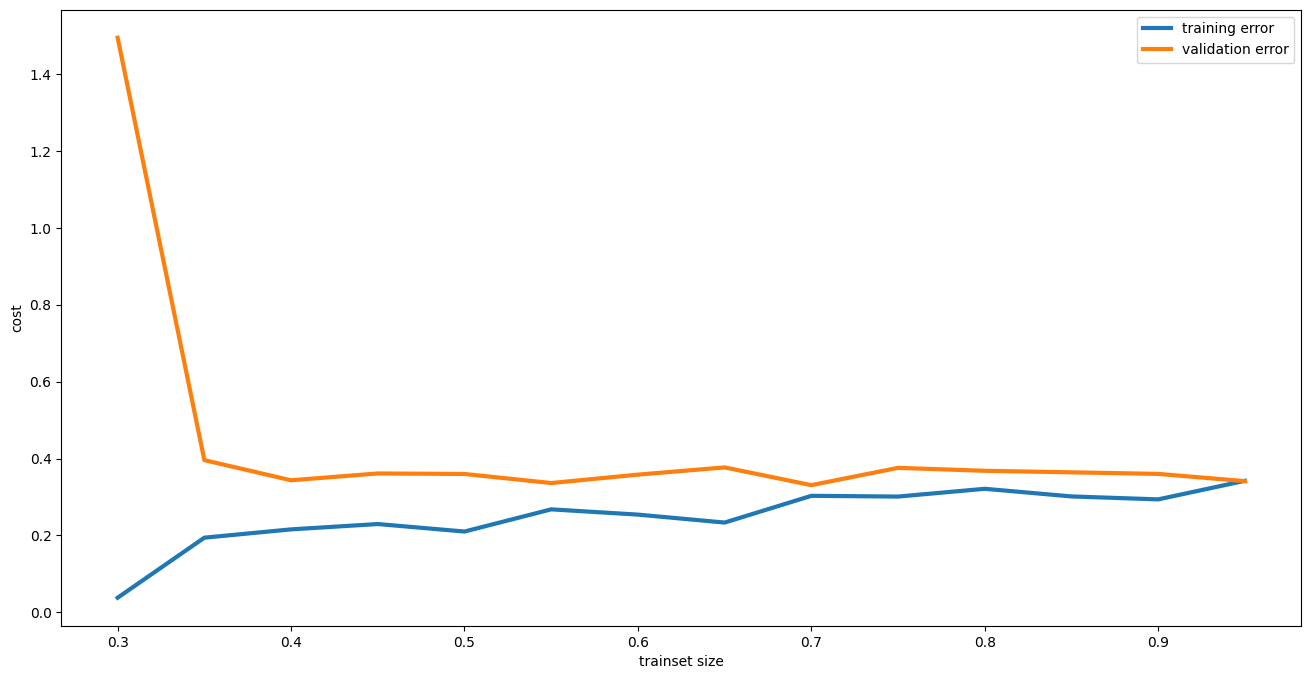

In [33]:
plot_learning_curve()
